In [1]:
from car_part import CarPartDataset, CarPartConfig, prepare_datasets, preprocess_dataset
from pathlib import Path
from mrcnn import visualize
import colorsys
import random
import numpy as np
import mrcnn.model as modellib
from mrcnn.model import log
import scipy.io as sio

import matplotlib.pyplot as plt

Using TensorFlow backend.


# How to train the model

In [2]:
part_annotation_files = Path(
    '/Users/fumarolaf/git/car-damage-estimation/datasets/trainval/Annotations_Part/')
images_path = Path('/Users/fumarolaf/git/car-damage-estimation/datasets/VOCdevkit/VOC2010/JPEGImages')

images_annotations_files = list(Path(part_annotation_files).glob('*.mat'))

## Prepare the datasets

In [3]:
dataset_train, dataset_val, dataset_test = prepare_datasets(images_path, images_annotations_files, 0.7, 0.8)

In [4]:
print(dataset_train.num_images, dataset_val.num_images, dataset_test.num_images)

715 102 205


### Check some images

In [5]:
i = 3

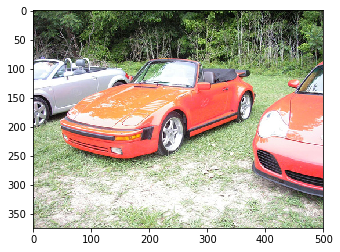

In [6]:
img = dataset_train.load_image(i)
plt.imshow(img)

In [7]:
mask, classes = dataset_train.load_mask(i)
img_copy = img.copy()

for l in range(mask.shape[-1]):
    img_copy = draw_mask(img_copy, mask[:,:,l], colors[l])
    
plt.imshow(img_copy)

NameError: name 'draw_mask' is not defined

In [ ]:
[dataset_val.class_names[c] for c in classes]

## Create the model

In [ ]:
import os

In [ ]:
config = CarPartConfig()
config.display()

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)
model.load_weights(model.get_imagenet_weights(), by_name=True)

In [ ]:
model.train(dataset_val, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=2, 
            layers='heads')

## Inspect the model results

In [ ]:
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
image_id = 3
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, config, image_id, use_mini_mask=False)
info = dataset_val.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset_val.image_reference(image_id)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)